In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:

# 38 47 39 15 50 45 Successful unbinding events

eok_data = [np.loadtxt("HBCseris/7EOK/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,39)]
eol_data = [np.loadtxt("HBCseris/7EOL/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,48)]
eom_data = [np.loadtxt("HBCseris/7EOM/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,40)]
eon_data = [np.loadtxt("HBCseris/7EON/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,16)]
eoo_data = [np.loadtxt("HBCseris/7EOO/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,51)]
eop_data = [np.loadtxt("HBCseris/7EOP/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,46)]

In [3]:
# 27 58 42 29 47 51 Successfull unbinding events

eok_data_cp = [np.loadtxt("HBCseris/7EOK_cp/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,28)]
eol_data_cp = [np.loadtxt("HBCseris/7EOL_cp/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,59)]
eom_data_cp = [np.loadtxt("HBCseris/7EOM_cp/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,43)]
eon_data_cp = [np.loadtxt("HBCseris/7EON_cp/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,30)]
eoo_data_cp = [np.loadtxt("HBCseris/7EOO_cp/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,48)]
eop_data_cp = [np.loadtxt("HBCseris/7EOP_cp/fes_"+str(i)+".dat",comments="#") for i in np.arange(1,52)]

Text(0.5, 1.0, '7EON')

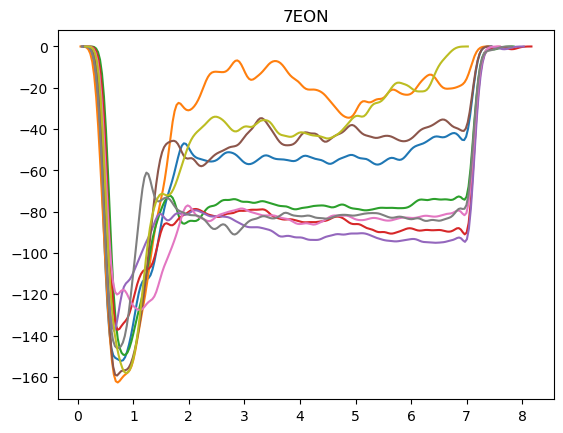

In [4]:
for i in range(9):
    plt.plot(eon_data[i][:,0],eon_data[i][:,1],label=str(i+1))
plt.title("7EON")

In [5]:
# we average the FES of CV from 0.0 to 7.0 nn, and we devinded into 200 intervals.

width=0.035 # width

grids = np.linspace(0,7,201)

In [6]:
def discretize_FES(data,cv_min=0.0,cv_max=7.0,bins=200):
    """
    For each fes.dat obtained from plumed metadynamics, we will first discretized the fes values into 
    binds alone the CV (from cv_min to cv_max) with number of bins as 200.
    The purpose is to standarlized each fes curve, and after this process, difference fes curves can be added 
    and the average energy at each bin (center) can be calculated
    This idea is from Scientific Reports | (2022) 12:2024 
    """
    width= (cv_max - cv_min)/bins
    
    cv_grids = np.linspace(cv_min,cv_max,bins+1)
    
    newFES = []
    
    Npoints=len(data[:,0])
    print (Npoints)
    for z,j in enumerate(cv_grids):
        flag = 0
        
        for i in range(Npoints-1):
            if (data[i,0] - j)*(data[i+1,0]-j) <= 0:
                flag = 1
                
                # linear interpolation: e = e1 + (D-D1)[(e2-e1)/(D2-D1)]
                energy = data[i,1] + (j-data[i,0])*(data[i+1,1]-data[i,1])/(data[i+1,0]-data[i,0])
        if flag == 1:
            newFES.append(energy)
        else:
            newFES.append(0.0)
    return newFES
                
        

In [7]:
eok_grid_fes = [discretize_FES(eok_data[i]) for i in range(38)]
eol_grid_fes = [discretize_FES(eol_data[i]) for i in range(47)]
eom_grid_fes = [discretize_FES(eom_data[i]) for i in range(39)]
eon_grid_fes = [discretize_FES(eon_data[i]) for i in range(15)]
eoo_grid_fes = [discretize_FES(eoo_data[i]) for i in range(50)]
eop_grid_fes = [discretize_FES(eop_data[i]) for i in range(45)]


211
205
218
210
187
206
213
208
223
207
202
206
214
209
207
212
208
216
217
207
209
211
207
206
210
205
207
207
226
211
205
218
210
187
206
213
208
223
207
202
206
214
209
207
212
208
216
217
207
209
211
207
206
210
205
207
207
226
223
187
212
216
207
210
207
213
209
215
207
211
208
212
206
208
210
207
211
210
205
213
208
211
207
228
208
214
214
209
210
213
211
206
211
209
179
204
208
207
207
208
205
217
211
213
211
205
211
214
209
212
208
209
206
215
209
185
208
215
206
213
206
223
202
205
208
228
204
205
206
207
211
208
214
211
216
211
197
205
208
215
208
208
224
208
207
212
205
217
210
210
208
218
215
210
209
218
228
226
209
212
220
196
210
207
216
226
215
223
207
211
208
206
208
208
197
208
207
205
206
208
215
210
209
212
209
207
180
208
207
207
208
211
210
208
211
210
208
209
207
207
212
216
210
219
206
209
206
210
206
207
206
208
208
217
220
206
209
207
214
207
208
208
213
215
206
207
214
207
207
219
216
210
210
205
220
230
209
216
212
205
210
213
215
213
210
212
223
219
227
213


In [8]:
eok_grid_fes_cp = [discretize_FES(eok_data_cp[i]) for i in range(27)]
eol_grid_fes_cp = [discretize_FES(eol_data_cp[i]) for i in range(58)]
eom_grid_fes_cp = [discretize_FES(eom_data_cp[i]) for i in range(42)]
eon_grid_fes_cp = [discretize_FES(eon_data_cp[i]) for i in range(29)]
eoo_grid_fes_cp = [discretize_FES(eoo_data_cp[i]) for i in range(47)]
eop_grid_fes_cp = [discretize_FES(eop_data_cp[i]) for i in range(51)]


205
207
207
208
212
208
209
213
217
205
208
206
203
205
205
206
211
206
207
206
216
212
208
205
210
205
207
209
213
214
211
202
217
213
211
222
204
208
216
223
213
210
228
214
210
202
202
206
211
207
207
210
212
206
224
213
209
215
216
209
210
210
208
210
218
223
210
207
208
206
213
212
215
210
210
209
212
206
221
209
217
211
214
229
222
208
203
210
209
208
207
209
208
207
208
208
206
209
208
208
200
203
212
216
207
208
207
209
206
179
207
207
208
220
207
204
207
209
208
209
207
209
208
205
208
204
206
205
214
207
209
206
216
207
218
208
211
211
206
213
207
209
202
206
206
189
218
205
207
211
207
215
207
213
204
208
210
216
224
207
210
208
203
205
209
209
209
210
224
205
212
209
203
208
201
207
213
216
207
202
213
208
208
220
206
209
201
208
209
209
210
208
206
216
210
202
208
218
207
207
210
208
213
209
205
209
205
207
212
207
206
208
221
201
209
210
207
201
207
219
207
212
207
204
207
205
206
216
207
203
207
208
201
205
219
208
209
205
208
207
207
206
207
207
206
207
209
208
210
207


In [9]:
CV_grids = np.linspace(0.0,7,201)

In [10]:
print (len(CV_grids))

201


In [11]:
print (CV_grids)

[0.    0.035 0.07  0.105 0.14  0.175 0.21  0.245 0.28  0.315 0.35  0.385
 0.42  0.455 0.49  0.525 0.56  0.595 0.63  0.665 0.7   0.735 0.77  0.805
 0.84  0.875 0.91  0.945 0.98  1.015 1.05  1.085 1.12  1.155 1.19  1.225
 1.26  1.295 1.33  1.365 1.4   1.435 1.47  1.505 1.54  1.575 1.61  1.645
 1.68  1.715 1.75  1.785 1.82  1.855 1.89  1.925 1.96  1.995 2.03  2.065
 2.1   2.135 2.17  2.205 2.24  2.275 2.31  2.345 2.38  2.415 2.45  2.485
 2.52  2.555 2.59  2.625 2.66  2.695 2.73  2.765 2.8   2.835 2.87  2.905
 2.94  2.975 3.01  3.045 3.08  3.115 3.15  3.185 3.22  3.255 3.29  3.325
 3.36  3.395 3.43  3.465 3.5   3.535 3.57  3.605 3.64  3.675 3.71  3.745
 3.78  3.815 3.85  3.885 3.92  3.955 3.99  4.025 4.06  4.095 4.13  4.165
 4.2   4.235 4.27  4.305 4.34  4.375 4.41  4.445 4.48  4.515 4.55  4.585
 4.62  4.655 4.69  4.725 4.76  4.795 4.83  4.865 4.9   4.935 4.97  5.005
 5.04  5.075 5.11  5.145 5.18  5.215 5.25  5.285 5.32  5.355 5.39  5.425
 5.46  5.495 5.53  5.565 5.6   5.635 5.67  5.705 5.

In [12]:
def calculate_aveFES(gridFes):
    """
    calculate the everage FES using the discretized FES curves
    """
    newgrid = np.asarray(gridFes)
    avgFEs = np.average(newgrid,axis=0)
    
    return avgFEs
    

(-40.0, 5.0)

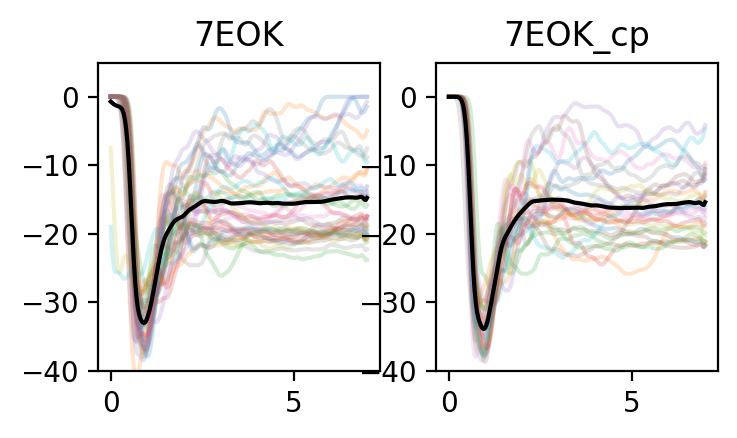

In [13]:
plt.figure(figsize=(4,2),dpi=200)
colors = ['red','green','blue','yellow','magenta']
plt.subplot(1,2,1)
for i in range(38):
    plt.plot(CV_grids,np.asarray(eok_grid_fes[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eok_grid_fes)*0.239,label="avg",color='black')
plt.title('7EOK')
plt.ylim([-40,5])

plt.subplot(1,2,2)
for i in range(27):
    plt.plot(CV_grids,np.asarray(eok_grid_fes_cp[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eok_grid_fes_cp)*0.239,label="avg",color='black')
plt.title('7EOK_cp')
plt.ylim([-40,5])

In [14]:
print (eok_grid_fes)

[[0.0, 0.0, 0.0, -0.013966898039496698, -0.1283555460799085, -0.5156375726842979, -1.5069243112563542, -3.6849430780546824, -7.855174010921299, -14.894559932810122, -25.35109728176634, -39.00176820165975, -54.67477773821958, -70.50477606725435, -84.63355216645641, -95.94300849574472, -104.41690328785604, -110.87807827518597, -116.3177850731693, -121.35858457333852, -126.06339971003952, -130.16053129947028, -133.3807871307104, -135.6759119250905, -137.18643587675012, -138.03635964129964, -138.23520644455076, -137.73794552298776, -136.55011647250447, -134.7525030264376, -132.40064375225154, -129.43046131042922, -125.66908305803048, -120.91804258806886, -115.0834203760101, -108.2887530544315, -100.98320299175488, -93.9265959591288, -87.99030200823648, -83.80477482124932, -81.40728581326744, -80.19056354030754, -79.2188764079303, -77.78499992858494, -75.80733664248532, -73.78725262891093, -72.40055959142096, -72.03524513623147, -72.57645114838141, -73.54374900282184, -74.43850144611214, -7

(-40.0, 5.0)

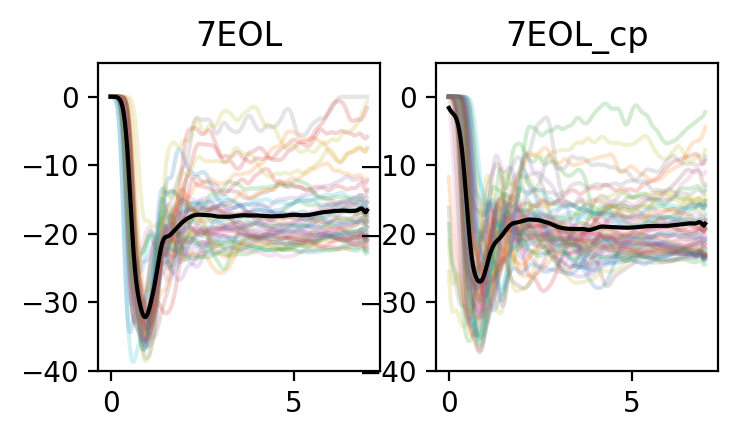

In [15]:
plt.figure(figsize=(4,2),dpi=200)
colors = ['red','green','blue','yellow','magenta']
plt.subplot(1,2,1)
for i in range(47):
    plt.plot(CV_grids,np.asarray(eol_grid_fes[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eol_grid_fes)*0.239,label="avg",color='black')
plt.title('7EOL')
plt.ylim([-40,5])

plt.subplot(1,2,2)
for i in range(58):
    plt.plot(CV_grids,np.asarray(eol_grid_fes_cp[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eol_grid_fes_cp)*0.239,label="avg",color='black')
plt.title('7EOL_cp')
plt.ylim([-40,5])

(-40.0, 5.0)

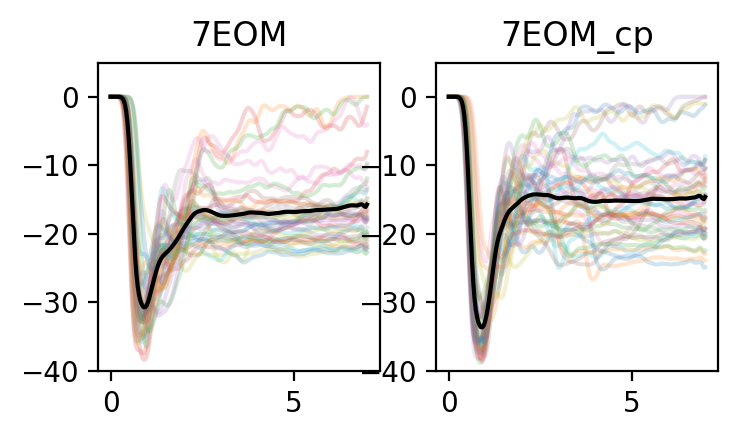

In [16]:
plt.figure(figsize=(4,2),dpi=200)
colors = ['red','green','blue','yellow','magenta']
plt.subplot(1,2,1)
for i in range(39):
    plt.plot(CV_grids,np.asarray(eom_grid_fes[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eom_grid_fes)*0.239,label="avg",color='black')
plt.title('7EOM')
plt.ylim([-40,5])

plt.subplot(1,2,2)
for i in range(42):
    plt.plot(CV_grids,np.asarray(eom_grid_fes_cp[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eom_grid_fes_cp)*0.239,label="avg",color='black')
plt.title('7EOM_cp')
plt.ylim([-40,5])

(-40.0, 5.0)

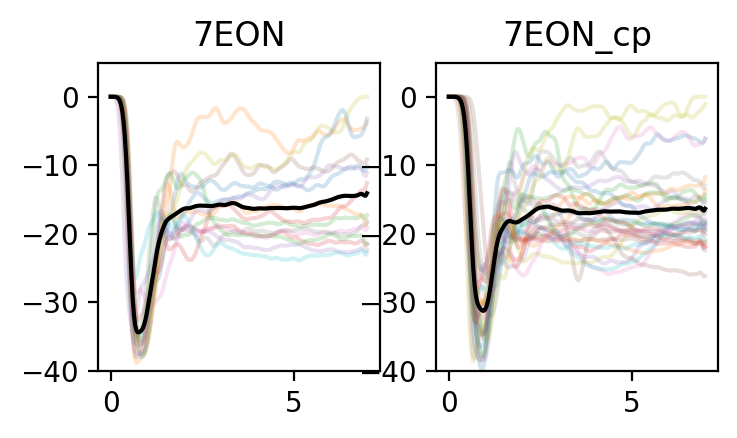

In [17]:
plt.figure(figsize=(4,2),dpi=200)
colors = ['red','green','blue','yellow','magenta']
plt.subplot(1,2,1)
for i in range(15):
    plt.plot(CV_grids,np.asarray(eon_grid_fes[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eon_grid_fes)*0.239,label="avg",color='black')
plt.title('7EON')
plt.ylim([-40,5])

plt.subplot(1,2,2)
for i in range(29):
    plt.plot(CV_grids,np.asarray(eon_grid_fes_cp[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eon_grid_fes_cp)*0.239,label="avg",color='black')
plt.title('7EON_cp')
plt.ylim([-40,5])

(-40.0, 5.0)

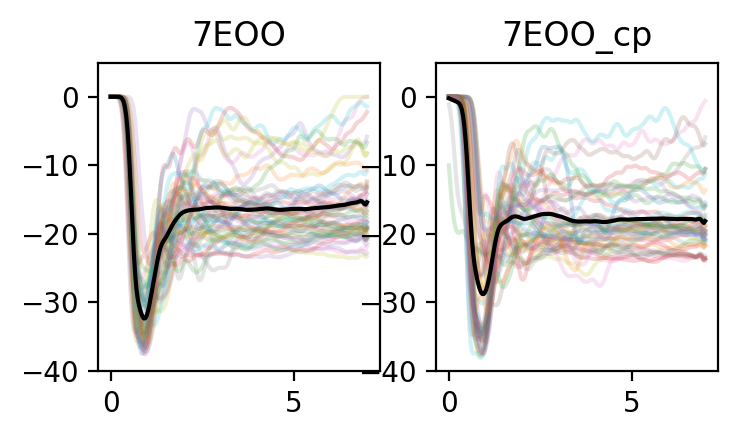

In [18]:
plt.figure(figsize=(4,2),dpi=200)
colors = ['red','green','blue','yellow','magenta']
plt.subplot(1,2,1)
for i in range(50):
    plt.plot(CV_grids,np.asarray(eoo_grid_fes[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eoo_grid_fes)*0.239,label="avg",color='black')
plt.title('7EOO')
plt.ylim([-40,5])

plt.subplot(1,2,2)
for i in range(47):
    plt.plot(CV_grids,np.asarray(eoo_grid_fes_cp[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eoo_grid_fes_cp)*0.239,label="avg",color='black')
plt.title('7EOO_cp')
plt.ylim([-40,5])

(-40.0, 5.0)

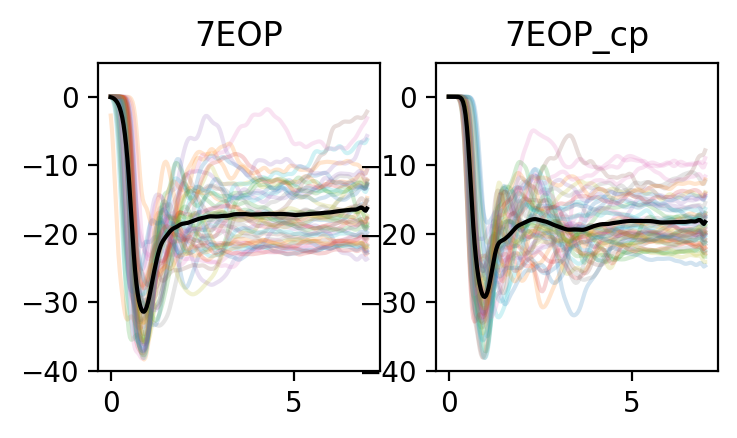

In [19]:
plt.figure(figsize=(4,2),dpi=200)
colors = ['red','green','blue','yellow','magenta']
plt.subplot(1,2,1)
for i in range(45):
    plt.plot(CV_grids,np.asarray(eop_grid_fes[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eop_grid_fes)*0.239,label="avg",color='black')
plt.title('7EOP')
plt.ylim([-40,5])

plt.subplot(1,2,2)
for i in range(51):
    plt.plot(CV_grids,np.asarray(eop_grid_fes_cp[i])*0.239,label='discretize'+str(i+1),alpha=0.2)
    #plt.plot(data[i][:,0],data[i][:,1],label="orginal"+str(i+1),color=colors[i])
plt.plot(CV_grids,calculate_aveFES(eop_grid_fes_cp)*0.239,label="avg",color='black')
plt.title('7EOP_cp')
plt.ylim([-40,5])

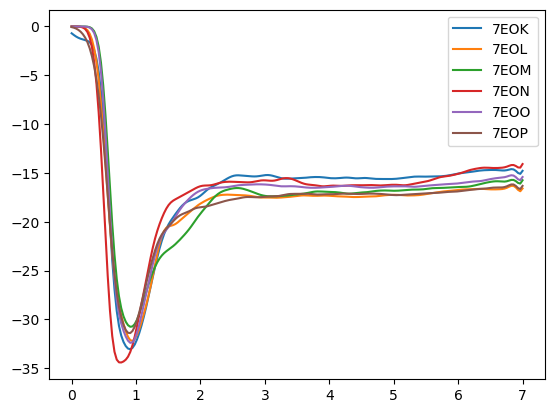

In [20]:
plt.plot(CV_grids,calculate_aveFES(eok_grid_fes)*0.239,label="7EOK")
plt.plot(CV_grids,calculate_aveFES(eol_grid_fes)*0.239,label="7EOL")
plt.plot(CV_grids,calculate_aveFES(eom_grid_fes)*0.239,label="7EOM")
plt.plot(CV_grids,calculate_aveFES(eon_grid_fes)*0.239,label="7EON")
plt.plot(CV_grids,calculate_aveFES(eoo_grid_fes)*0.239,label="7EOO")
plt.plot(CV_grids,calculate_aveFES(eop_grid_fes)*0.239,label="7EOP")
plt.legend()

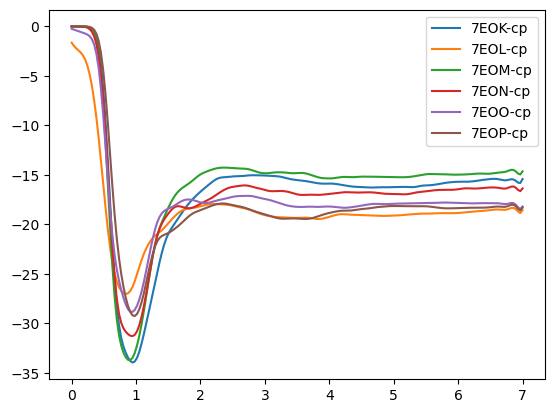

In [21]:
plt.plot(CV_grids,calculate_aveFES(eok_grid_fes_cp)*0.239,label="7EOK-cp")
plt.plot(CV_grids,calculate_aveFES(eol_grid_fes_cp)*0.239,label="7EOL-cp")
plt.plot(CV_grids,calculate_aveFES(eom_grid_fes_cp)*0.239,label="7EOM-cp")
plt.plot(CV_grids,calculate_aveFES(eon_grid_fes_cp)*0.239,label="7EON-cp")
plt.plot(CV_grids,calculate_aveFES(eoo_grid_fes_cp)*0.239,label="7EOO-cp")
plt.plot(CV_grids,calculate_aveFES(eop_grid_fes_cp)*0.239,label="7EOP-cp")
plt.legend()

In [22]:
print (np.argmin(calculate_aveFES(eok_grid_fes)))
print (np.argmin(calculate_aveFES(eol_grid_fes)))
print (np.argmin(calculate_aveFES(eom_grid_fes)))
print (np.argmin(calculate_aveFES(eon_grid_fes)))
print (np.argmin(calculate_aveFES(eoo_grid_fes)))
print (np.argmin(calculate_aveFES(eop_grid_fes)))


26
27
26
22
26
26


In [23]:
print (np.argmin(calculate_aveFES(eok_grid_fes_cp)))
print (np.argmin(calculate_aveFES(eol_grid_fes_cp)))
print (np.argmin(calculate_aveFES(eom_grid_fes_cp)))
print (np.argmin(calculate_aveFES(eon_grid_fes_cp)))
print (np.argmin(calculate_aveFES(eoo_grid_fes_cp)))
print (np.argmin(calculate_aveFES(eop_grid_fes_cp)))

27
24
26
27
27
28


In [24]:
print (np.argmin(calculate_aveFES(eol_grid_fes)))
print (CV_grids[150])

27
5.250000000000001


In [25]:
# now calculate the convergence of deltaG as a function of iteration number 

def deltaG_converge(allgridFes,nruns=5,minx=25, maxinx=150):
    """
    calculate the deltaG using different number of metadynamics runs
    We will first need to define the bound state (cv_bound=0.6) and 
    unbound state (cv_unbound=2.2) on the CV
    """
    deltaG=[]
    for i in range(1,nruns+1):
        t_gridEFS = allgridFes[0:i]
        averageFES = calculate_aveFES(t_gridEFS)
        deltaG.append(np.mean(averageFES[minx-2:minx+2])-np.mean(averageFES[maxinx-2:maxinx+2]))
    return deltaG
    
        
        
        
    

In [26]:
# 38 47 39 15 50 45 
eok_deltaG = deltaG_converge(eok_grid_fes,minx=26,nruns=38)
eol_deltaG = deltaG_converge(eol_grid_fes,minx=27,nruns=47)
eom_deltaG = deltaG_converge(eom_grid_fes,minx=26,nruns=39)
eon_deltaG = deltaG_converge(eon_grid_fes,minx=22,nruns=15)
eoo_deltaG = deltaG_converge(eoo_grid_fes,minx=26,nruns=50)
eop_deltaG = deltaG_converge(eop_grid_fes,minx=26,nruns=45)

In [27]:
# 27 58 42 29 47 51
eok_deltaG_cp = deltaG_converge(eok_grid_fes_cp,minx=27,nruns=27)
eol_deltaG_cp = deltaG_converge(eol_grid_fes_cp,minx=24,nruns=58)
eom_deltaG_cp = deltaG_converge(eom_grid_fes_cp,minx=26,nruns=42)
eon_deltaG_cp = deltaG_converge(eon_grid_fes_cp,minx=27,nruns=29)
eoo_deltaG_cp = deltaG_converge(eoo_grid_fes_cp,minx=27,nruns=47)
eop_deltaG_cp = deltaG_converge(eop_grid_fes_cp,minx=28,nruns=51)

(-30.0, 0.0)

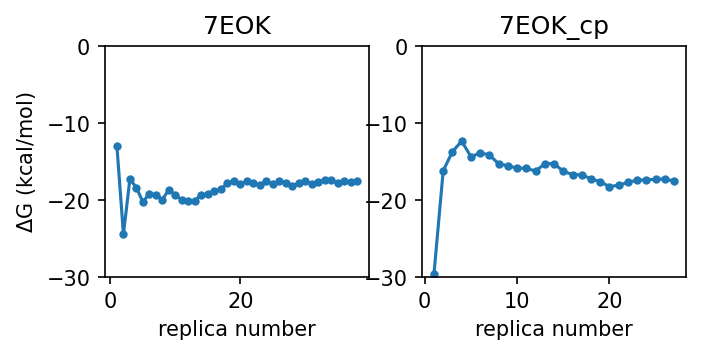

In [28]:
plt.figure(figsize=(5,2),dpi=150)
plt.subplot(1,2,1)
plt.plot(np.arange(1,39),np.asarray(eok_deltaG)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.ylabel("$\Delta$G (kcal/mol)")
plt.title("7EOK")
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")
plt.ylim([-30,0])
plt.subplot(1,2,2)
plt.plot(np.arange(1,28),np.asarray(eok_deltaG_cp)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.title("7EOK_cp")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

(-30.0, 0.0)

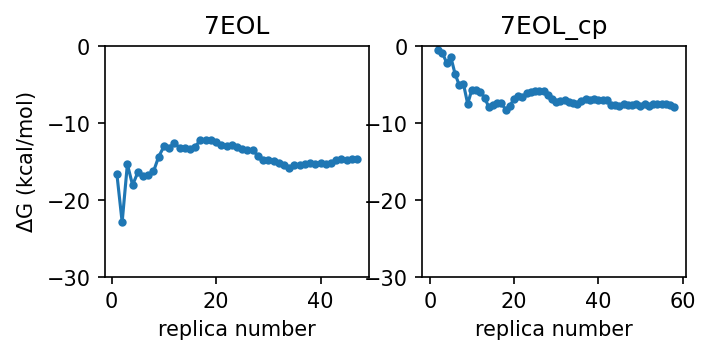

In [29]:
plt.figure(figsize=(5,2),dpi=150)
plt.subplot(1,2,1)
plt.plot(np.arange(1,48),np.asarray(eol_deltaG)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.ylabel("$\Delta$G (kcal/mol)")
plt.title("7EOL")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

plt.subplot(1,2,2)
plt.plot(np.arange(1,59),np.asarray(eol_deltaG_cp)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.title("7EOL_cp")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

(-30.0, 0.0)

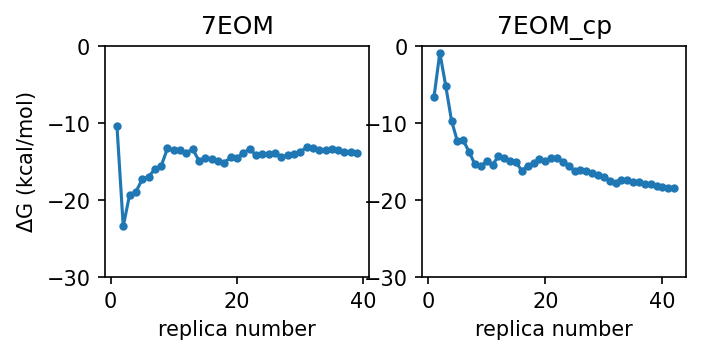

In [30]:
plt.figure(figsize=(5,2),dpi=150)
plt.subplot(1,2,1)
plt.plot(np.arange(1,40),np.asarray(eom_deltaG)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.ylabel("$\Delta$G (kcal/mol)")
plt.title("7EOM")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

plt.subplot(1,2,2)
plt.plot(np.arange(1,43),np.asarray(eom_deltaG_cp)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.title("7EOM_cp")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

(-30.0, 0.0)

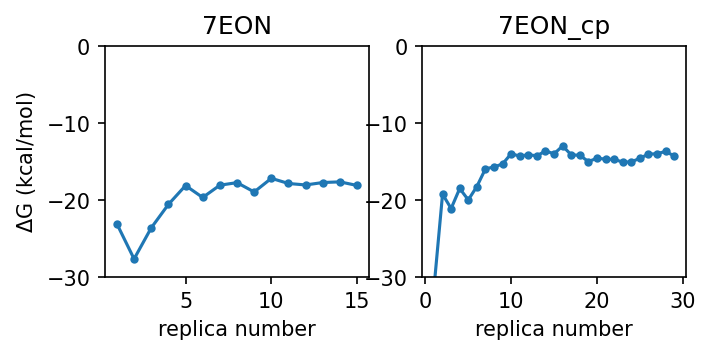

In [31]:
plt.figure(figsize=(5,2),dpi=150)
plt.subplot(1,2,1)
plt.plot(np.arange(1,16),np.asarray(eon_deltaG)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.ylabel("$\Delta$G (kcal/mol)")
plt.title("7EON")
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")
plt.ylim([-30,0])
plt.subplot(1,2,2)
plt.plot(np.arange(1,30),np.asarray(eon_deltaG_cp)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.title("7EON_cp")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

(-30.0, 0.0)

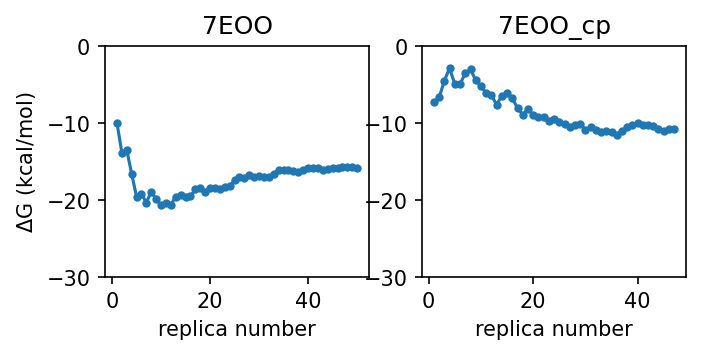

In [32]:
plt.figure(figsize=(5,2),dpi=150)
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),np.asarray(eoo_deltaG)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.ylabel("$\Delta$G (kcal/mol)")
plt.title("7EOO")
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")
plt.ylim([-30,0])
plt.subplot(1,2,2)
plt.plot(np.arange(1,48),np.asarray(eoo_deltaG_cp)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.title("7EOO_cp")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

(-30.0, 0.0)

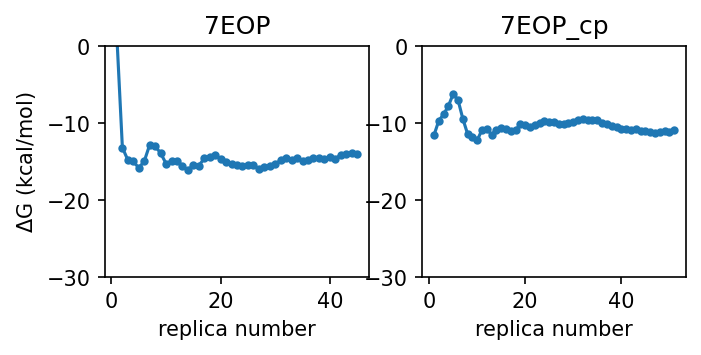

In [33]:
plt.figure(figsize=(5,2),dpi=150)
plt.subplot(1,2,1)
plt.plot(np.arange(1,46),np.asarray(eop_deltaG)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.ylabel("$\Delta$G (kcal/mol)")
plt.title("7EOP")
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")
plt.ylim([-30,0])
plt.subplot(1,2,2)
plt.plot(np.arange(1,52),np.asarray(eop_deltaG_cp)*0.239,".-")
#plt.ylim([-18,-5])
plt.xlabel("replica number")
plt.title("7EOP_cp")
plt.ylim([-30,0])
#plt.plot([0,60],[-14.5,-14.5],'--')
#plt.text(30,-12,"7EOK -14.5 kcal/mol")
#plt.ylabel("binding free energy (kcal/mol)")

In [34]:
print (np.std(eok_deltaG[-3:])*0.239,np.std(eol_deltaG[-3:])*0.239, np.std(eom_deltaG[-3:])*0.239, np.std(eon_deltaG[-3:])*0.239,\
np.std(eoo_deltaG[-3:])*0.239,np.std(eop_deltaG[-3:])*0.239)

0.05453054610479446 0.051537621646537 0.026328121525323732 0.20437960180530992 0.05530695304911502 0.09870964297125438


In [35]:
print (np.std(eok_deltaG_cp[-3:])*0.239,np.std(eol_deltaG_cp[-3:])*0.239, np.std(eom_deltaG_cp[-3:])*0.239, np.std(eon_deltaG_cp[-3:])*0.239,\
np.std(eoo_deltaG_cp[-3:])*0.239,np.std(eop_deltaG_cp[-3:])*0.239)

0.12401591508484809 0.14877602084352212 0.05843716364791269 0.24130390191079254 0.08069698892381474 0.1129284341197721


In [36]:
eok_final = np.mean(eok_deltaG[-3:])*0.239
eol_final = np.mean(eol_deltaG[-3:])*0.239
eom_final = np.mean(eom_deltaG[-3:])*0.239
eon_final = np.mean(eon_deltaG[-3:])*0.239
eoo_final = np.mean(eoo_deltaG[-3:])*0.239
eop_final = np.mean(eop_deltaG[-3:])*0.239

In [37]:
eok_cp_final = np.mean(eok_deltaG_cp[-3:])*0.239
eol_cp_final = np.mean(eol_deltaG_cp[-3:])*0.239
eom_cp_final = np.mean(eom_deltaG_cp[-3:])*0.239
eon_cp_final = np.mean(eon_deltaG_cp[-3:])*0.239
eoo_cp_final = np.mean(eoo_deltaG_cp[-3:])*0.239
eop_cp_final = np.mean(eop_deltaG_cp[-3:])*0.239

In [38]:
#KD 
cases = ['7EOK','7EOL','7EOM','7EON','7EOO','7EOP']
expt=[-11.056 ,-11.161 ,-10.3345,-10.8153,-11.50,-11.2166]#,-8.14778] # 273K
colors = ['orangered','chocolate','lightsalmon','salmon','darkred','red']

calc_sc = [eok_final,eol_final,eom_final,eon_final,eoo_final,eop_final] # no crystal packing

calc_cp = [eok_cp_final,eol_cp_final,eom_cp_final,eon_cp_final,eoo_cp_final,eop_cp_final] # crystal packing

In [39]:
print (calc_sc)

[-17.55424600145483, -14.711430542515396, -13.815156771225674, -17.818775356985714, -15.702905102308584, -13.9824348271669]


In [40]:
print (calc_cp)

[-17.361266608759486, -7.709111674621656, -18.330767572125573, -13.976501868427144, -10.873051786750771, -11.063305360341616]


In [41]:
from scipy import stats

In [42]:
#slope, intercept, r, p, se = linregress(x, y)

In [43]:
exptvales = np.linspace(-12,-10,50)

In [44]:
 print (exptvales)

[-12.         -11.95918367 -11.91836735 -11.87755102 -11.83673469
 -11.79591837 -11.75510204 -11.71428571 -11.67346939 -11.63265306
 -11.59183673 -11.55102041 -11.51020408 -11.46938776 -11.42857143
 -11.3877551  -11.34693878 -11.30612245 -11.26530612 -11.2244898
 -11.18367347 -11.14285714 -11.10204082 -11.06122449 -11.02040816
 -10.97959184 -10.93877551 -10.89795918 -10.85714286 -10.81632653
 -10.7755102  -10.73469388 -10.69387755 -10.65306122 -10.6122449
 -10.57142857 -10.53061224 -10.48979592 -10.44897959 -10.40816327
 -10.36734694 -10.32653061 -10.28571429 -10.24489796 -10.20408163
 -10.16326531 -10.12244898 -10.08163265 -10.04081633 -10.        ]


In [45]:
res_sc = stats.linregress(expt, calc_sc)
res_cp = stats.linregress(expt, calc_cp)

In [46]:
print(f"R-squared: {res_sc.rvalue**2:.6f}")
print(f"R-squared: {res_cp.rvalue**2:.6f}")

R-squared: 0.016144
R-squared: 0.503593


In [47]:
expts_sc = list(zip(expt,calc_sc))
expts_cp = list(zip(expt,calc_cp))

In [48]:
for i in expts_cp:
    print (i[1])

-17.361266608759486
-7.709111674621656
-18.330767572125573
-13.976501868427144
-10.873051786750771
-11.063305360341616


In [52]:
import scienceplots as sp

In [53]:
plt.style.use('nature')

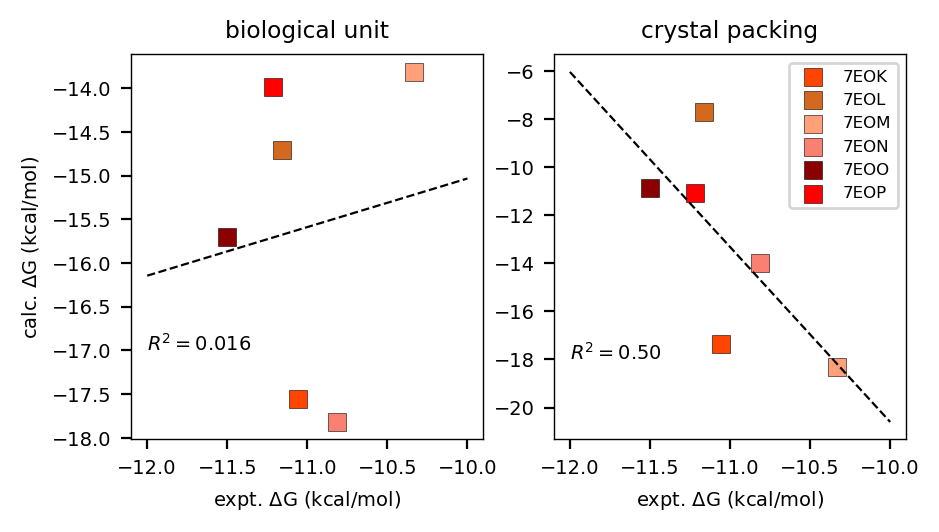

In [87]:
plt.figure(figsize=(5,2.5),dpi=200)
plt.subplot(1,2,1)
plt.title("biological unit")
for i,j in enumerate(expts_sc):
    plt.scatter(j[0],j[1],marker="s",color=colors[i],s=40,label=cases[i],edgecolor='black',linewidth=0.2)
plt.plot(exptvales,res_sc.slope*exptvales+res_sc.intercept,'k--',lw=0.8)
plt.xlabel("expt. $\Delta$G (kcal/mol)")
plt.ylabel("calc. $\Delta$G (kcal/mol)")
plt.text(-12,-17,"$R^{2} = 0.016$")
#plt.legend()


plt.subplot(1,2,2)
plt.title("crystal packing")
for i,j in enumerate(expts_cp):
    plt.scatter(j[0],j[1],marker="s",color=colors[i],s=40,label=cases[i],edgecolor='black',linewidth=0.2)
plt.plot(exptvales,res_cp.slope*exptvales+res_cp.intercept,'k--',lw=0.8)
plt.xlabel("expt. $\Delta$G (kcal/mol)")
#plt.ylabel("calc (kcal/mol)",fontsize=12)
plt.text(-12,-18,"$R^{2} = 0.50$")
plt.legend(fontsize=6)
#plt.subplots_adjust(wspace=0.3)


In [154]:
#KD 
cases = ['Theo','TAL1','TAL2','TAL3']
expt = [-7.67663,-10.8163,-9.9981,-9.4974] # experimental results
colors=['greenyellow','darkgreen','limegreen','palegreen']
calc = [-3.8,-1.5,-1.5,-2.5] # chain
calc_cp = [-7.0,-12.0,-8.3,-13.0]



In [155]:
res = scipy.stats.linregress(expt, calc)
cp_res = scipy.stats.linregress(expt, calc_cp)

In [161]:
expts = list(zip(expt,calc))

In [162]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.926155


In [163]:
print(f"R-squared: {cp_res.rvalue**2:.6f}")

R-squared: 0.398297


In [164]:
exptvales = np.linspace(-12,-6,50)

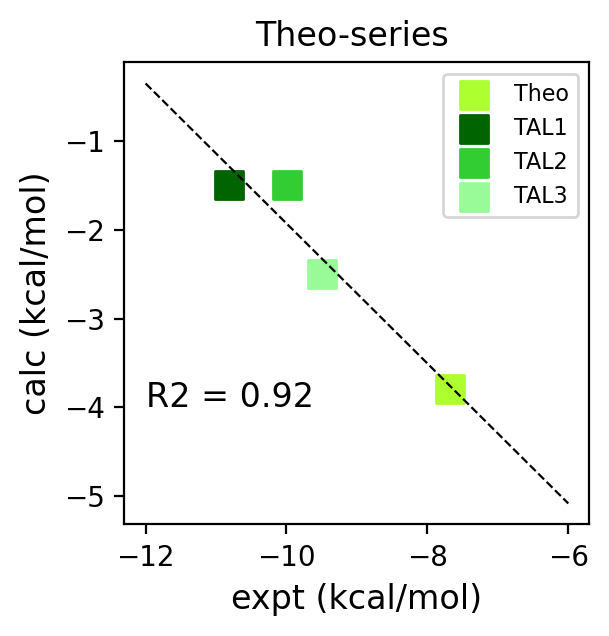

In [165]:
plt.figure(figsize=(3,3),dpi=200)
plt.title("Theo-series ")
for i,j in enumerate(expts):
    plt.scatter(j[0],j[1],marker="s",color=colors[i],s=100,label=cases[i])
plt.plot(exptvales,res.slope*exptvales+res.intercept,'k--',lw=0.8)
plt.xlabel("expt (kcal/mol)",fontsize=12)
plt.ylabel("calc (kcal/mol)",fontsize=12)
plt.text(-12,-14,"R2 = 0.92",fontsize=12)
plt.legend(fontsize=8)

In [166]:
expts = list(zip(expt,calc_cp))

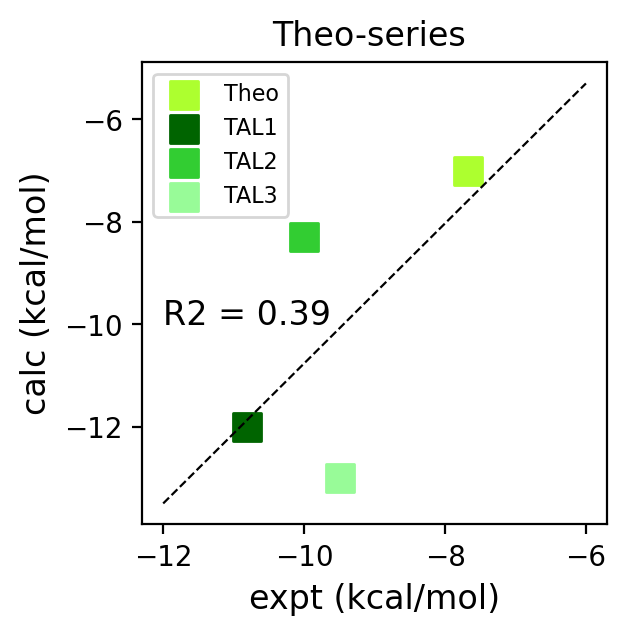

In [168]:
plt.figure(figsize=(3,3),dpi=200)
plt.title("Theo-series ")
for i,j in enumerate(expts):
    plt.scatter(j[0],j[1],marker="s",color=colors[i],s=100,label=cases[i])
plt.plot(exptvales,cp_res.slope*exptvales+cp_res.intercept,'k--',lw=0.8)
plt.xlabel("expt (kcal/mol)",fontsize=12)
plt.ylabel("calc (kcal/mol)",fontsize=12)
plt.text(-12,-10,"R2 = 0.39",fontsize=12)
plt.legend(fontsize=8)